In [3]:
!pip install matplotlib
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=62e2f0e360c6c023211ae22efd69acf061210754c7d35aaf0859ec156f7eb665
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


**Kelompok F**</br>
Andi Muhammad Rizki - 11201008 </br>
Hafizh Bagus Mustofa - 11201036 </br>
M. Nawfal Alhadi - 11201050 </br>
Reni Anggraeni - 11201084</br>
Tsaqila Bela Askarina - 11201090</br>

In [31]:
# Library Importing
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [32]:
# Read CSV Files
files_url = 'https://raw.githubusercontent.com/NawfalHadi/fuzzy-ibm/main/BMI.csv'
data_set = pd.read_csv(files_url)

print(data_set)

        Names  Height  Weight
0        Reza     175      40
1       Ariel     189      87
2      Jubair     185     110
3        Asma     195     104
4      Ismail     149      61
5    Alphonso     189     104
6      Edward     147      92
7       Mandy     154     111
8        Gita     174      90
9       Chris     169     103
10      Stark     195      81
11    Natasha     159      80
12     Kamala     192     101
13       Khan     155      51
14  Alexander     191      79
15        Eto     153     107
16       Wati     157     110
17       Alif     140     129
18       Isma     144     145
19     Nawfal     164      62
20     Parker     170      50


In [33]:
# Get Height And Weight For Checking.
weight_heigt = np.array(data_set)[:,[1,2]]
pd.DataFrame(weight_heigt)

,0,1
0,175,40
1,189,87
2,185,110
3,195,104
4,149,61
5,189,104
6,147,92
7,154,111
8,174,90
9,169,103


In [34]:
# separate the array as two array
weight_array = []
height_array = []

index = 0
for i in weight_heigt:
  # Weight
  weight_array.append(np.sum(weight_heigt[index:(index+1), 1]))
  # Height
  height_array.append(np.sum(weight_heigt[index:(index+1), 0]))
  # Index Increment
  index +=1

In [35]:
print(weight_array)
print(height_array)

[40, 87, 110, 104, 61, 104, 92, 111, 90, 103, 81, 80, 101, 51, 79, 107, 110, 129, 145, 62, 50]
[175, 189, 185, 195, 149, 189, 147, 154, 174, 169, 195, 159, 192, 155, 191, 153, 157, 140, 144, 164, 170]


**Fuzzy Model IBM**

---



In [36]:
def subjectRange(_low, _high, _step):
    subject = np.arange(_low, _high, _step)
    return subject

# Making A Chart Model
def fuzzyModelAlgorithm(_rule, _subject_range):
  underweight = fuzz.trimf(_subject_range, _rule[0])
  normal = fuzz.trimf(_subject_range, _rule[1])
  overweight = fuzz.trimf(_subject_range, _rule[2])
  obesity = fuzz.trimf(_subject_range, _rule[3])
  obesity_x = fuzz.trimf(_subject_range, _rule[4])

  # size of chart
  fig, ax = plt.subplots(nrows=1, figsize=(8, 4))
  ax.plot(_subject_range, underweight, 'blue', linewidth=1.5, label = 'Underweight')
  ax.plot(_subject_range, normal, 'green', linewidth=1.5, label = 'Normal')
  ax.plot(_subject_range, overweight, 'yellow', linewidth=1.5, label = 'Overweight')
  ax.plot(_subject_range, obesity, 'orange', linewidth=1.5, label = 'Obesity I')
  ax.plot(_subject_range, obesity_x, 'red', linewidth=1.5, label = 'Obesity II')

  ax.set_title("IBM")
  ax.legend()

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  plt.tight_layout()
  plt.show()

  return underweight, normal, overweight, obesity, obesity_x


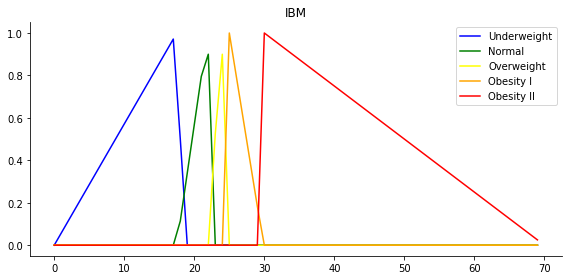

In [48]:
# Making a start and end point of the range
ranges = subjectRange(0, 70, 1)

# Ranges Of Each Rules
bmiRanges = np.array([
    # Underweight
    [0, 17.5, 18.5],
    # Normal
    [17.5, 21.9, 22.9],
    # Overweight
    [22, 23.9, 24.9],
    # Obesity I
    [24, 25, 29.9],
    # Obesity II
    [29, 30, 70]
])

uw, no, ow, ob, obx = fuzzyModelAlgorithm(bmiRanges, ranges)

**GET IBM From Height & Weight Value**

In [49]:
def ibmCalculator(_h, _w):
  height = (_h / 100) ** 2
  calculation = _w / height

  return "%.2f" % calculation

In [50]:
ibm_array = []

for i in range(len(height_array)):
  height = height_array[i]
  weight = weight_array[i]

  ibm_calculated = ibmCalculator(height, weight)
  ibm_array.append(ibm_calculated)

In [51]:
# Check IBM Array
print(ibm_array)

['13.06', '24.36', '32.14', '27.35', '27.48', '29.11', '42.57', '46.80', '29.73', '36.06', '21.30', '31.64', '27.40', '21.23', '21.66', '45.71', '44.63', '65.82', '69.93', '23.05', '17.30']


**Derajat Keangotaan Dari IBM**

In [41]:
def ibmFuncMember(_range, _uw, _no, _ow, _ob, _obx, _nilai):
  uw = fuzz.interp_membership(_range, _uw, _nilai)
  no = fuzz.interp_membership(_range, _no, _nilai)
  ow = fuzz.interp_membership(_range, _ow, _nilai)
  ob = fuzz.interp_membership(_range, _ob, _nilai)
  obx = fuzz.interp_membership(_range, _obx, _nilai)

  return "%.2f" % uw,"%.2f" % no,"%.2f" % ow, "%.2f" % ob,"%.2f" % obx

In [42]:
def ibmStatus(_uw, _no, _ow, _ob, _obx):
  if(_uw > 0):
    if(_uw > _no):
      return "Under Weight"
    else:
      return "Normal"
  
  elif(_no > 0):
    if(_no > _ow):
      return "Normal"
    else:
      return "Over Weight"
  
  elif(_ow > 0):
    if(_ow > _ob):
      return "Over Weight"
    else:
      return "Obesity I"

  elif(_ob > 0):
    if(_ob > _obx):
      return "Obesity I"
    else:
      return "Obesity II"

  else:
    return "Obesity II"

In [54]:
ibm_level = []
for i in ibm_array:
  value = ibmFuncMember(ranges, uw, no, ow, ob, obx, i)
  ibm_level.append(value)

**STATUS**

In [59]:
names = np.array(data_set)[:,[0]]
for i in range(len(names)):
  level = ibmStatus(float(ibm_level[i][0]),float(ibm_level[i][1]),
                        float(ibm_level[i][2]), float(ibm_level[i][3]),
                        float(ibm_level[i][4]))
  print(f"{names[i]} : {level} <-- {ibm_level[i]}")


['Reza'] : Under Weight <-- ('0.75', '0.00', '0.00', '0.00', '0.00')
['Ariel'] : Over Weight <-- ('0.00', '0.00', '0.58', '0.36', '0.00')
['Jubair'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.00', '0.95')
['Asma'] : Obesity I <-- ('0.00', '0.00', '0.00', '0.52', '0.00')
['Ismail'] : Obesity I <-- ('0.00', '0.00', '0.00', '0.49', '0.00')
['Alphonso'] : Obesity I <-- ('0.00', '0.00', '0.00', '0.16', '0.11')
['Edward'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.00', '0.69')
['Mandy'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.00', '0.58')
['Gita'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.05', '0.73')
['Chris'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.00', '0.85')
['Stark'] : Normal <-- ('0.00', '0.83', '0.00', '0.00', '0.00')
['Natasha'] : Obesity II <-- ('0.00', '0.00', '0.00', '0.00', '0.96')
['Kamala'] : Obesity I <-- ('0.00', '0.00', '0.00', '0.51', '0.00')
['Khan'] : Normal <-- ('0.00', '0.82', '0.00', '0.00', '0.00')
['Alexander'] : Normal <-- ('0.00', '0.86', '0.00', 